In [104]:
# imports for libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [105]:
df = pd.read_csv('data/kc_house_data.csv', index_col=0).drop_duplicates() # (30155,25), 3 duplicated entries

In [106]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30152 entries, 7399300360 to 9557800100
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30152 non-null  object 
 1   price          30152 non-null  float64
 2   bedrooms       30152 non-null  int64  
 3   bathrooms      30152 non-null  float64
 4   sqft_living    30152 non-null  int64  
 5   sqft_lot       30152 non-null  int64  
 6   floors         30152 non-null  float64
 7   waterfront     30152 non-null  object 
 8   greenbelt      30152 non-null  object 
 9   nuisance       30152 non-null  object 
 10  view           30152 non-null  object 
 11  condition      30152 non-null  object 
 12  grade          30152 non-null  object 
 13  heat_source    30120 non-null  object 
 14  sewer_system   30138 non-null  object 
 15  sqft_above     30152 non-null  int64  
 16  sqft_basement  30152 non-null  int64  
 17  sqft_garage    30152 non-null  int64

In [108]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015200e+04,30152.000000,30152.000000,30152.000000,3.015200e+04,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000,30152.000000
mean,1.108029e+06,3.413571,2.334671,2112.408729,1.672492e+04,1.543380,1809.839347,476.010812,330.227414,217.396856,1975.159591,90.931348,47.328477,-121.319050
std,8.946277e+05,0.981653,0.889548,974.052997,6.038545e+04,0.567615,878.325182,579.635101,285.770425,245.309503,32.065976,416.492770,1.433181,5.722034
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405361,-122.326050
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551385,-122.225635
75%,1.300000e+06,4.000000,3.000000,2619.250000,1.057925e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669911,-122.116236
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


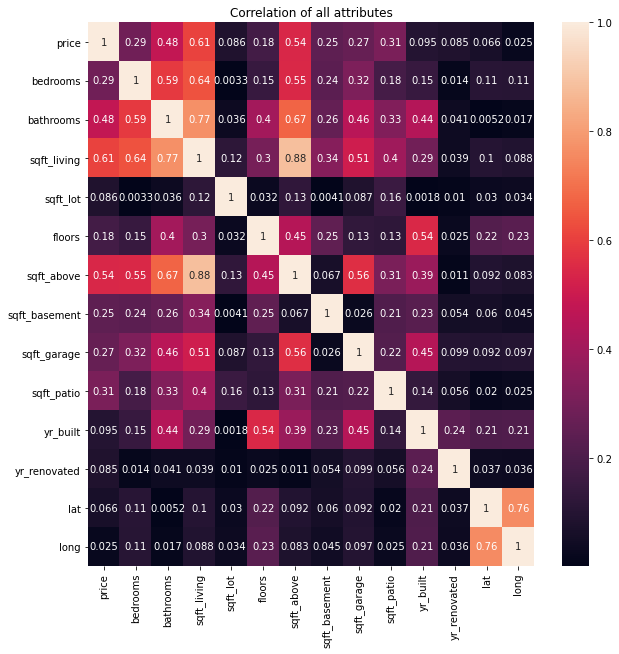

In [109]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(df.corr()),annot=True).set(title = "Correlation of all attributes");

In [110]:
numeric_df = df.select_dtypes([int,float])
numeric_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052
8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591
1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520
1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020
8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188


In [111]:
cat_df = df.select_dtypes(object)
cat_df.head()

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address
id,,,,,,,,,,
7399300360,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ..."
8910500230,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing..."
1180000275,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9..."
1604601802,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington..."
8562780790,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt..."


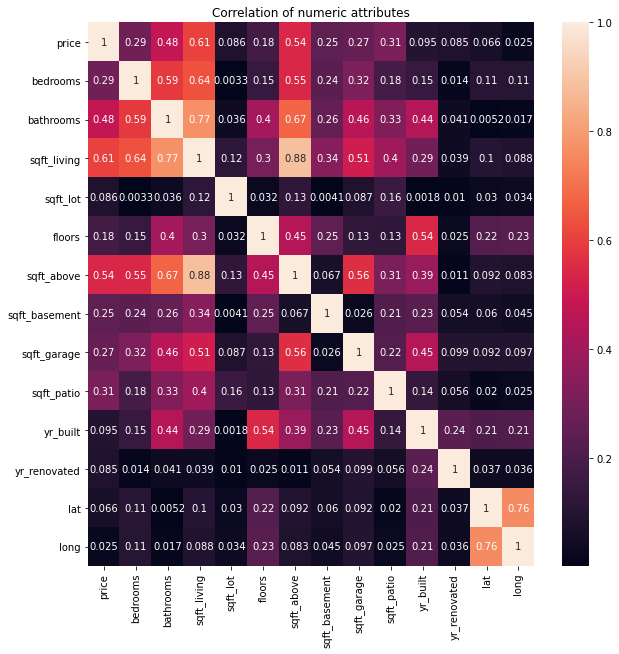

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(abs(numeric_df.corr()),annot=True).set(title = "Correlation of numeric attributes");

In [113]:
cat_df["address"].values

array(['2102 Southeast 21st Court, Renton, Washington 98055, United States',
       '11231 Greenwood Avenue North, Seattle, Washington 98133, United States',
       '8504 South 113th Street, Seattle, Washington 98178, United States',
       ...,
       '910 Martin Luther King Jr Way, Seattle, Washington 98122, United States',
       '17127 114th Avenue Southeast, Renton, Washington 98055, United States',
       '18615 7th Avenue South, Burien, Washington 98148, United States'],
      dtype=object)

In [114]:

zips = []
street_num = []
street_name = []
city = []
state = []
country = []

# make the address data useable
for i in cat_df["address"]:
    # create variable to store partitioned strings from address column
    # first will be used in certain iterations
    info = i.split(",")
    first = info[0].split(" ")

    # store variables in appropriate lists
    zips.append(info[-2][-5:])
    street_num.append(first[0])
    street_name.append(" ".join(first[1:len(first)]))
    city.append(info[1][1:])
    state.append(info[-2][1:-6])
    country.append(info[-1][1:])

# create columns from the lists in the cat_df
cat_df["zips"] = zips
cat_df["street_num"] = street_num
cat_df["street_name"] = street_name
cat_df["city"] = city
cat_df["state"]= state
cat_df["country"] = country

cat_df.head()


<ipython-input-114-54a29cad20f7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["zips"] = zips
<ipython-input-114-54a29cad20f7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["street_num"] = street_num
<ipython-input-114-54a29cad20f7>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address,zips,street_num,street_name,city,state,country
id,,,,,,,,,,,,,,,,
7399300360,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ...",98055,2102,Southeast 21st Court,Renton,Washington,United States
8910500230,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing...",98133,11231,Greenwood Avenue North,Seattle,Washington,United States
1180000275,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9...",98178,8504,South 113th Street,Seattle,Washington,United States
1604601802,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington...",98118,4079,Letitia Avenue South,Seattle,Washington,United States
8562780790,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt...",98027,2193,Northwest Talus Drive,Issaquah,Washington,United States


In [117]:
month_int = []
day_int = []
year_int = []

# split up the date column into a seperate month, day, year column for use as int
for i in cat_df["date"]:
    info = i.split("/")
    month_int.append(int(info[0]))
    day_int.append(int(info[1]))
    year_int.append(int(info[2]))

cat_df["mont_int"] = month_int
cat_df["day_int"] = day_int
cat_df["year_int"] = year_int

cat_df.head()

<ipython-input-117-f32fe7a9efeb>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["mont_int"] = month_int
<ipython-input-117-f32fe7a9efeb>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["day_int"] = day_int
<ipython-input-117-f32fe7a9efeb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,date,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,address,zips,street_num,street_name,city,state,country,mont_int,day_int,year_int
id,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,"2102 Southeast 21st Court, Renton, Washington ...",98055,2102,Southeast 21st Court,Renton,Washington,United States,5,24,2022
8910500230,12/13/2021,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,"11231 Greenwood Avenue North, Seattle, Washing...",98133,11231,Greenwood Avenue North,Seattle,Washington,United States,12,13,2021
1180000275,9/29/2021,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,"8504 South 113th Street, Seattle, Washington 9...",98178,8504,South 113th Street,Seattle,Washington,United States,9,29,2021
1604601802,12/14/2021,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,"4079 Letitia Avenue South, Seattle, Washington...",98118,4079,Letitia Avenue South,Seattle,Washington,United States,12,14,2021
8562780790,8/24/2021,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,"2193 Northwest Talus Drive, Issaquah, Washingt...",98027,2193,Northwest Talus Drive,Issaquah,Washington,United States,8,24,2021
